In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

import pandas as pd

In [3]:
path = "C:\\Users\\91958\\planet_fastai\\"


df = pd.read_csv( path+ 'train_v2.csv\\train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
tfms = get_transforms(flip_vert = True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)


###warp = make something become bent or twisted out of shape.

In [6]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))


In [7]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

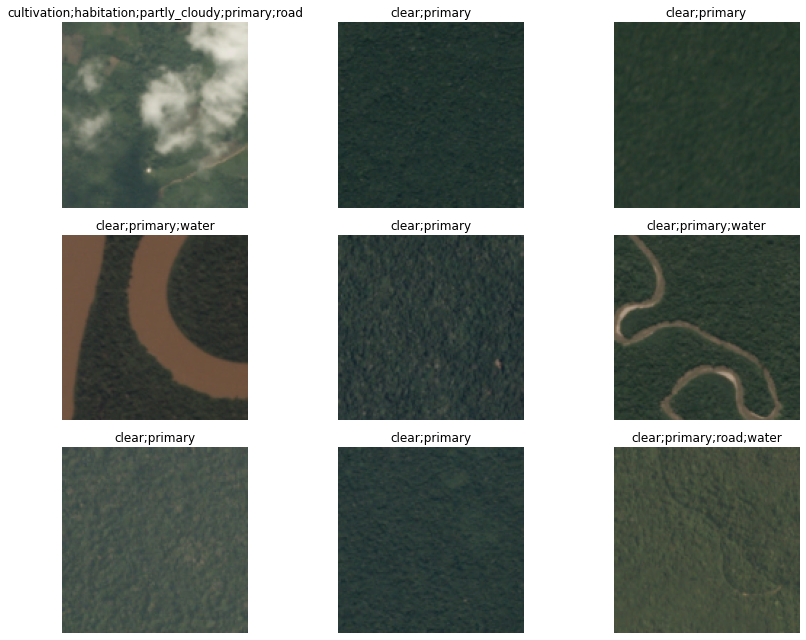

In [8]:
data.show_batch(rows=3, figsize=(12,9))

In [9]:
####we determined the predicition for a given class by picking the final activation that was the biggest,
### but here, each activation can be 0. or 1. accuracy_thresh
###selects the ones that are above a certain threshold (0.5 by default) and compares them to the ground truth.


###As for Fbeta, it's the metric that was used by Kaggle on this competition.

acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, models.resnet50, metrics=[acc_02, f_score])


In [10]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.157037,0.124851,0.941423,0.890354,05:22
1,0.121309,0.103349,0.948087,0.910142,05:04
2,0.106137,0.096538,0.954358,0.914877,05:18
3,0.101833,0.092951,0.952810,0.918984,10:27
4,0.099917,0.092239,0.954191,0.919188,10:43


In [11]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


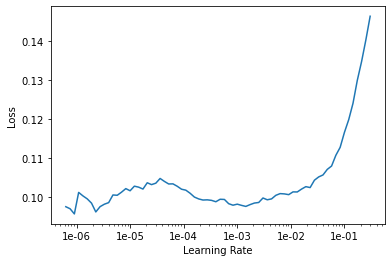

In [12]:
learn.recorder.plot()

In [13]:
learn.save('planet-1')

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(3, slice(1e-04, 1e-03))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 4.00 GiB total capacity; 1.99 GiB already allocated; 0 bytes free; 2.03 GiB reserved in total by PyTorch)